In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [35]:
data = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [36]:
missingValues = data.isna().any()
#missingValues.loc[missingValues[1] == True]

#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [23]:
data["PoolQC"] = data['PoolQC'].isnull().astype(int)



In [30]:
data.loc("PoolQC" == "Ex")

ValueError: No axis named False for object type <class 'type'>

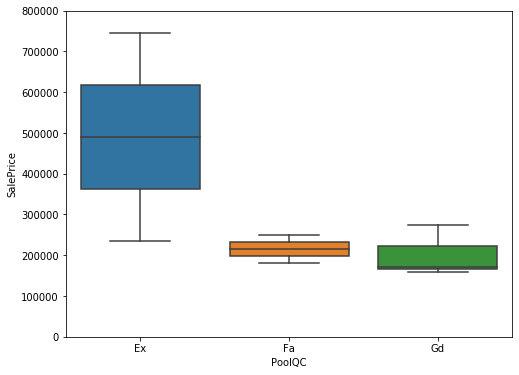

In [27]:
#box plot PoolQC/saleprice
var = 'PoolQC'
dataBis = pd.concat([data['SalePrice'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=dataBis)
fig.axis(ymin=0, ymax=800000);

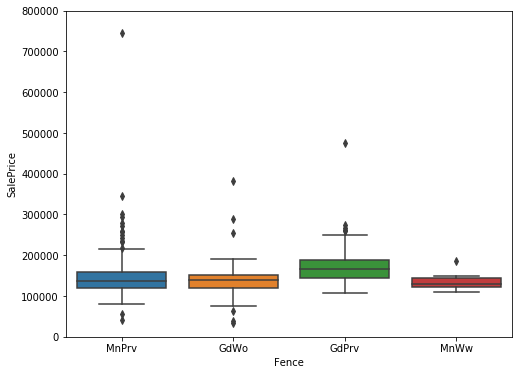

In [31]:
#box plot PoolQC/saleprice
var = 'Fence'
dataBis = pd.concat([data['SalePrice'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=dataBis)
fig.axis(ymin=0, ymax=800000);

In [32]:
processed_data = data.drop((missing_data[missing_data['Total'] > 1]).index,1)
processed_data = processed_data.drop(processed_data.loc[processed_data['Electrical'].isnull()].index)
processed_data.isnull().sum().max()

0

In [35]:
export_csv = processed_data.to_csv (r'../data/non_null.csv', index = None, header=True)

print (export_csv)

None


In [37]:
dummies = pd.get_dummies(data)
dummies;

In [43]:
corrmat = dummies.corr()
corrmat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.020738,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,-0.051807,0.128311,-0.023466,-0.094298,-0.023965,-0.037030,-0.019817,0.016684,-0.076258,0.126571
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.019779,-0.156175,-0.050663,0.163684,-0.046367,-0.038888,-0.033444,-0.023873,0.161642,-0.151659
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,-0.023431,0.346954,0.012122,-0.238463,-0.110233,-0.045601,-0.010104,-0.035785,-0.158427,0.343895
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,-0.039952,0.325647,-0.011431,-0.182733,-0.135942,-0.040294,-0.020727,-0.048056,-0.120577,0.322837
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,-0.022891,0.171125,-0.026065,-0.131484,-0.044767,-0.011959,-0.010116,-0.009915,-0.084801,0.167483
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,-0.017825,0.044883,0.010652,-0.024778,-0.024832,-0.014874,0.021369,0.000765,-0.019560,0.044912


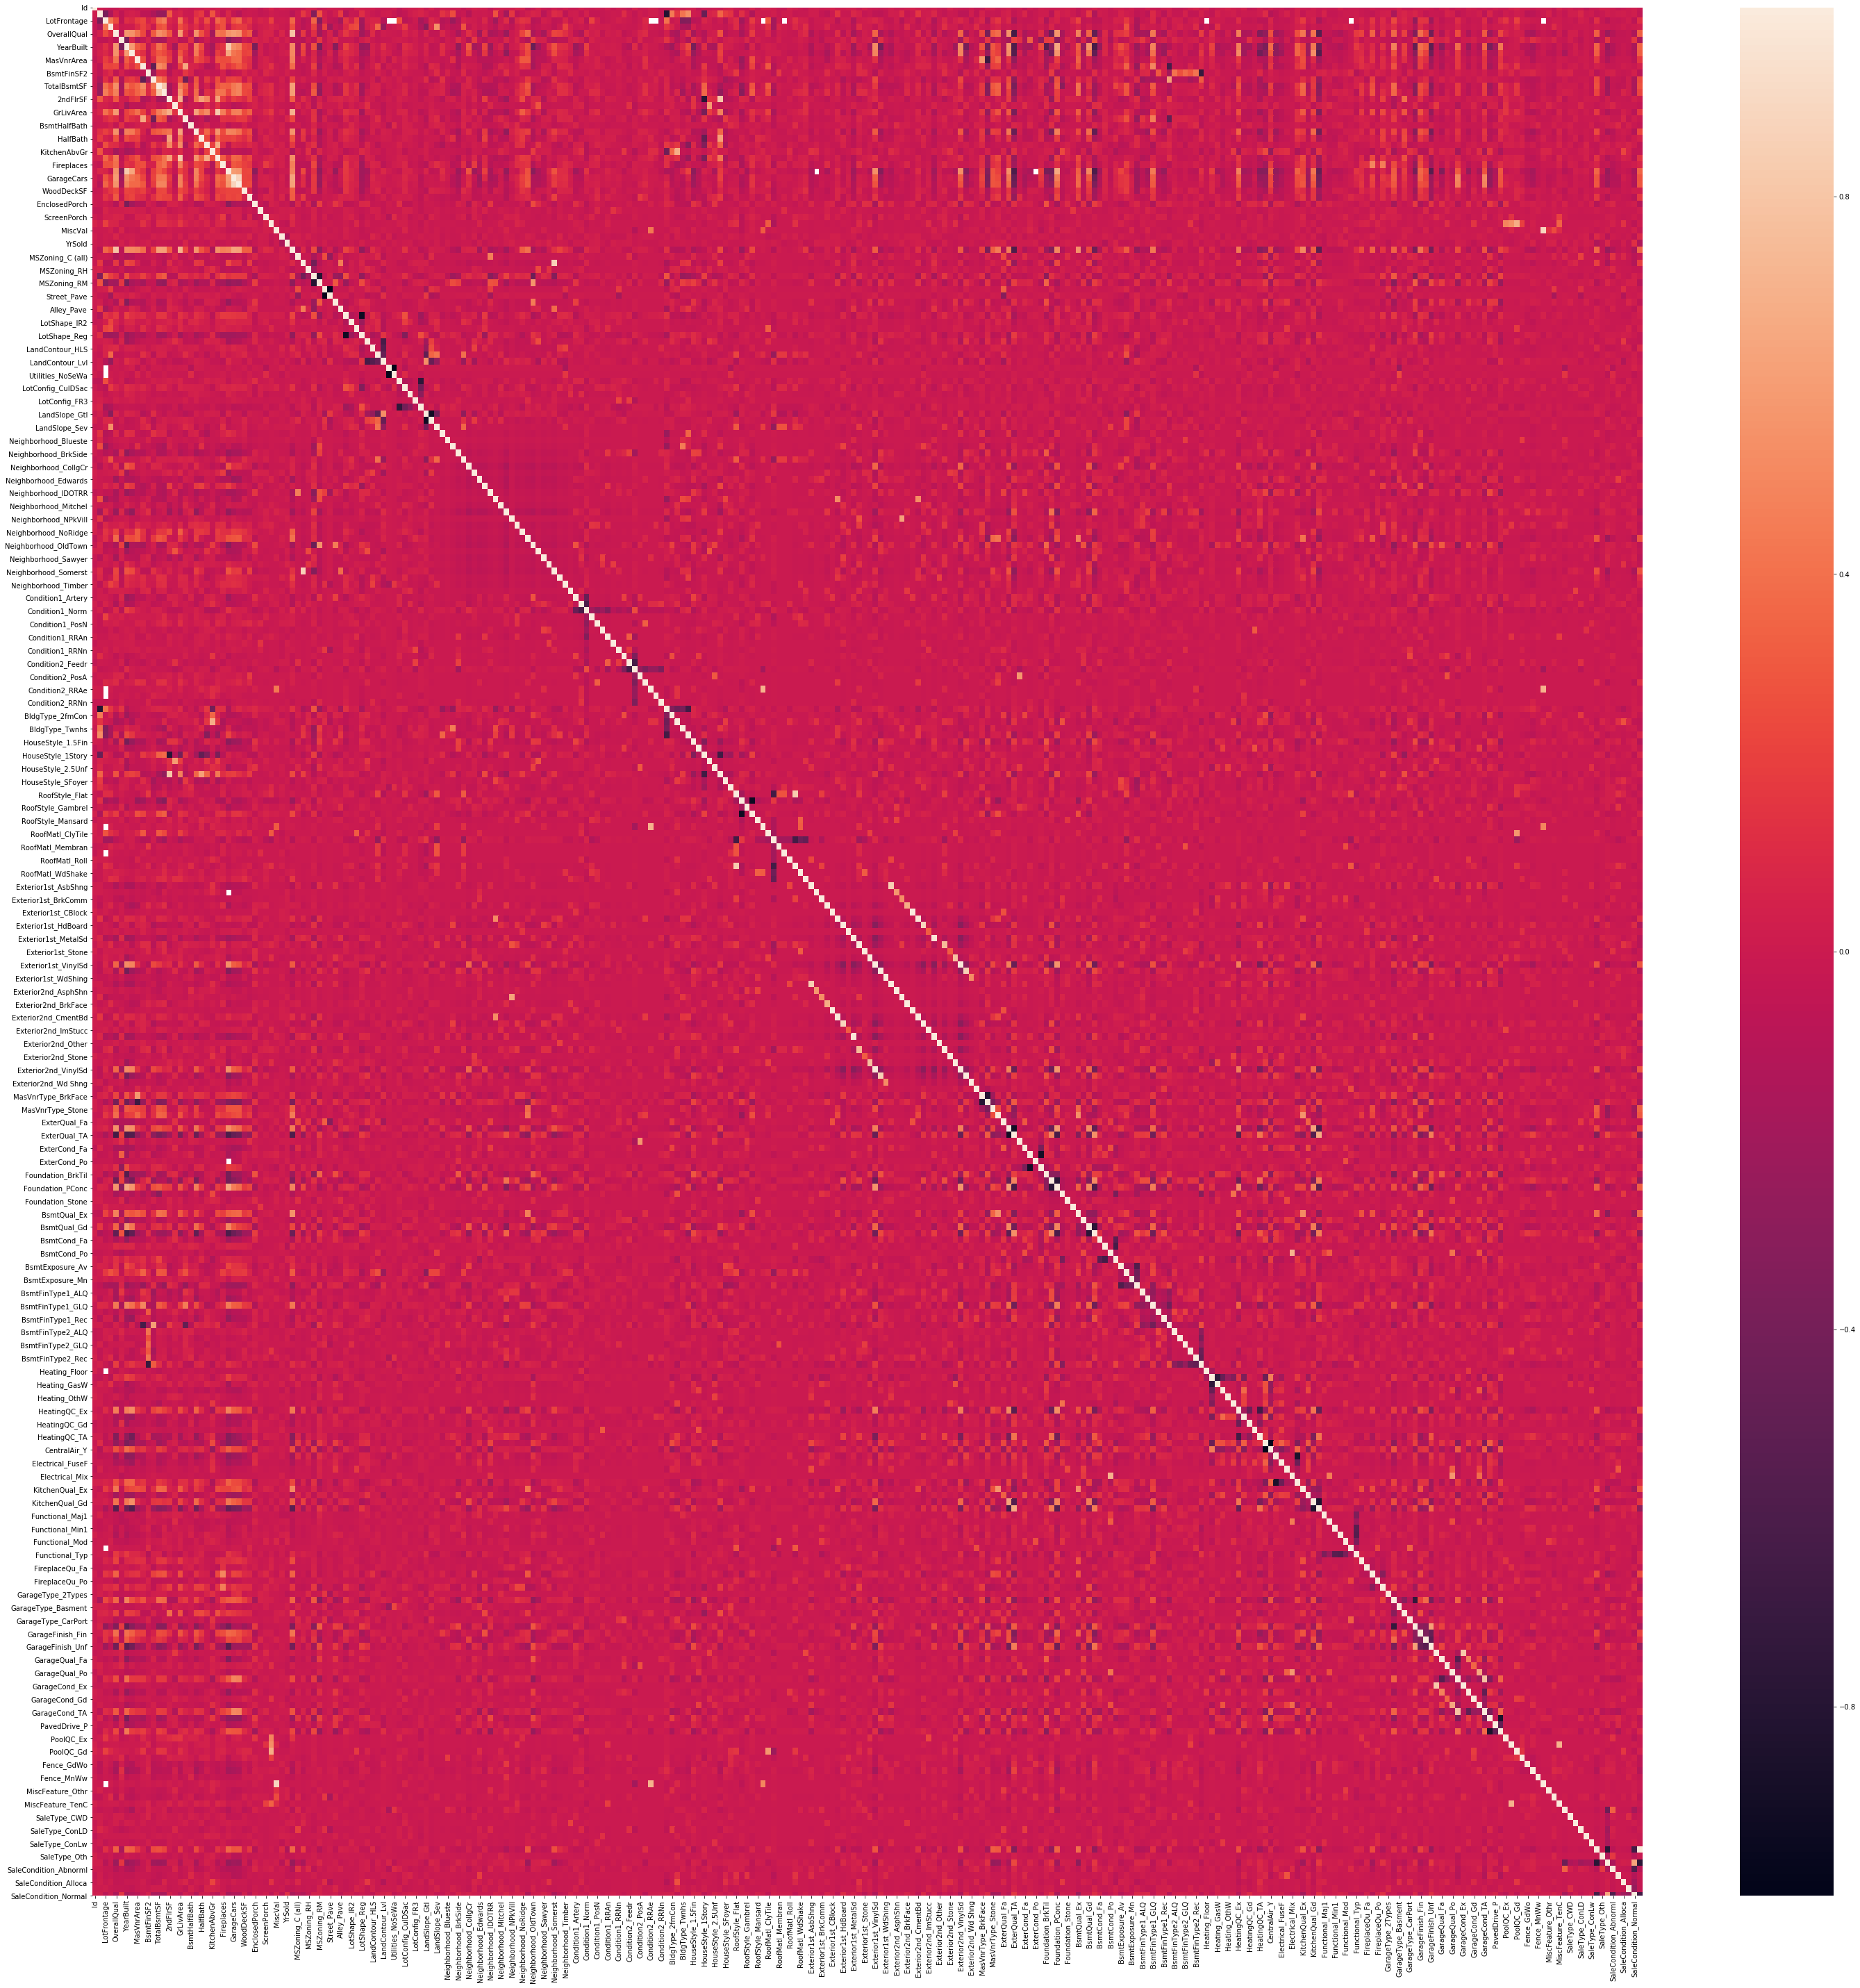

In [45]:
plt.figure(figsize=(50, 50))
sns.heatmap(corrmat)

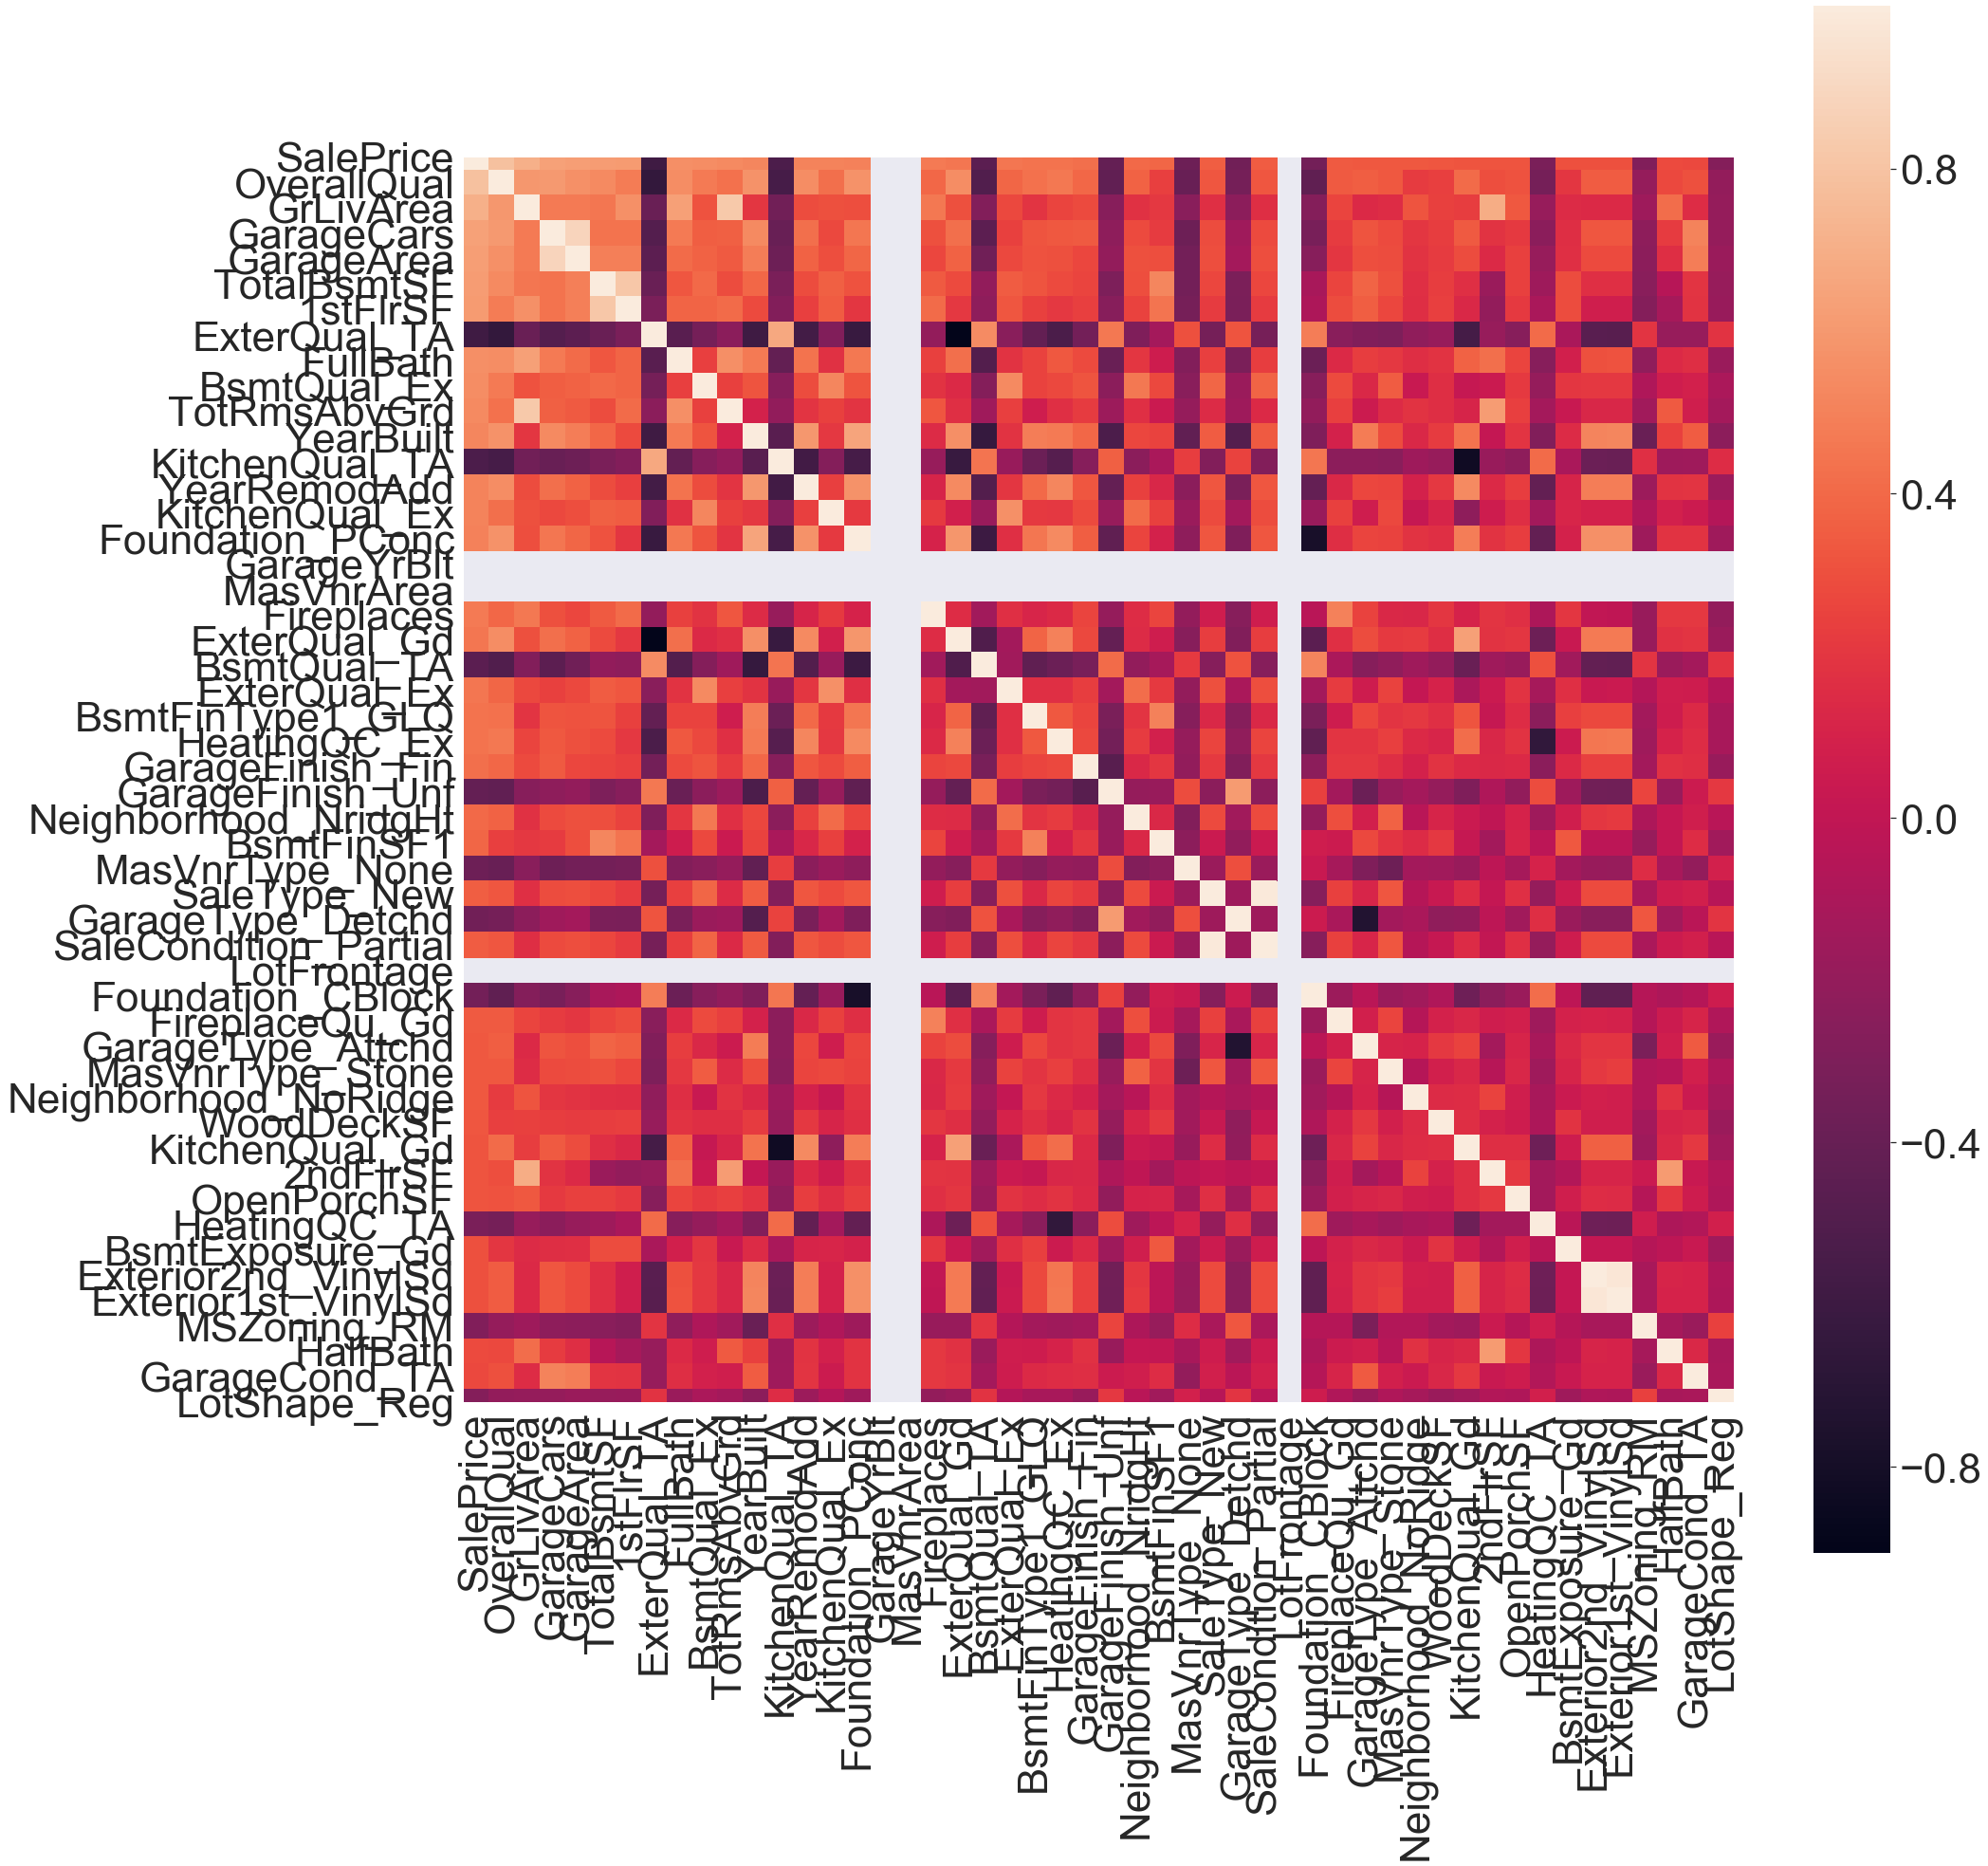

In [60]:
k = 50

cols = corrmat.abs().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dummies[cols].values.T)
sns.set(font_scale=4)
plt.figure(figsize=(30, 30))

hm = sns.heatmap(cm, cbar=True, annot=False, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [54]:
data["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [6]:
processed_data = data.drop((missing_data[missing_data['Total'] > 1]).index,1)
processed_data = processed_data.drop(processed_data.loc[processed_data['Electrical'].isnull()].index)
processed_data.isnull().sum().max()
mydata = processed_data

In [32]:
mydata.drop(mydata[(mydata['OverallQual']<5) & (mydata['SalePrice']>200000)].index, inplace=True)
mydata.drop(mydata[(mydata['GrLivArea']>4000) & (mydata['SalePrice']<300000)].index, inplace=True)
mydata.reset_index(drop=True, inplace=True)

# Some of the non-numeric predictors are stored as numbers; we convert them into strings 
mydata['MSSubClass'] = mydata['MSSubClass'].apply(str)
mydata['YrSold'] = mydata['YrSold'].astype(str)
mydata['MoSold'] = mydata['MoSold'].astype(str)

mydata;

In [33]:
mydata.drop("Id", 1);

In [16]:
mydata["SalePrice"] = np.log1p(data["SalePrice"])

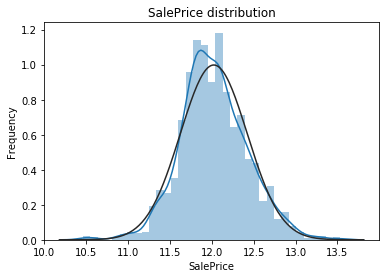

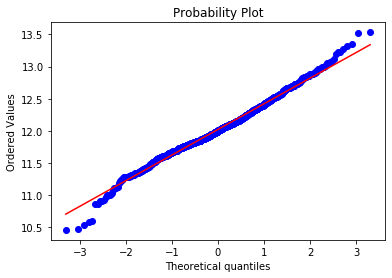

In [22]:
sns.distplot(mydata['SalePrice'] , fit=norm);

plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(mydata['SalePrice'], plot=plt)
plt.show()

In [34]:
data_numeric = mydata[mydata.dtypes[mydata.dtypes != "object"].index];

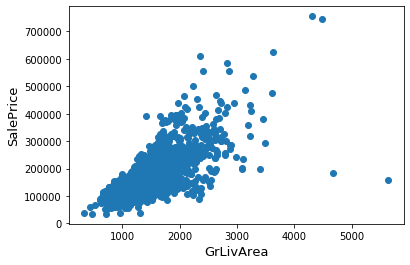

In [30]:
fig, ax = plt.subplots()
ax.scatter(x = data['GrLivArea'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

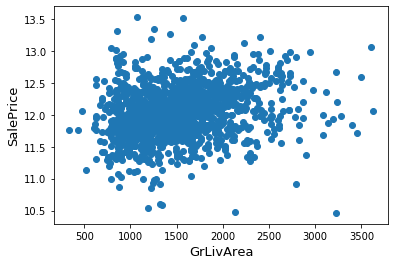

In [31]:
fig, ax = plt.subplots()
ax.scatter(x = data_numeric['GrLivArea'], y = data_numeric['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [25]:
export_csv = data_numeric.to_csv (r'../data/training_1.0.csv', index = None, header=True)


In [29]:
sub = pd.DataFrame()
sub['Id'] = test["Id"]
sub['SalePrice'] = test["Id"]
sub.to_csv('../submissions/submission_1.0.csv',index=False)